## MURA valid数据集
这里数据整理的结果将会以如下表格的形式呈现，可能需要修改的部分都被用“#”标出。出于整理的需求，所有图片都被resize过（可以修改resize的尺寸）
数据整理结果:

             index        |    image_vector(shape = (1, H*W*3))  |   label   
               1                   [,...,]                          positive/negative
              

In [2]:
#所有lib都在STAT479的project里面用过
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from skimage.transform import resize
from PIL import Image

%matplotlib inline

In [4]:
valid_img_path = pd.read_csv("valid_image_paths.csv", header=None)
valid_img_label = pd.read_csv("valid_labeled_studies.csv", header=None)

In [5]:
valid_img_path.head()

,0
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [6]:
valid_img_label.head()

,0,1
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


In [9]:
redundant_prefix = 'MURA-v1.1/'    ##preparing labels
len_prefix = len(redundant_prefix)

label_repeat_times  = []
for i in range(valid_img_label.shape[0]):
    if len(os.listdir(valid_img_label.iloc[i,0][len_prefix:]))==0:
        label_repeat_times.append(0)
    else:
        repeat_times_perObs = len(os.listdir(valid_img_label.iloc[i,0][len_prefix:]))
        label_repeat_times.append(repeat_times_perObs)

assert(len(label_repeat_times) == valid_img_label.shape[0])

valid_img_label['repeat_times'] = label_repeat_times

ReportLabel = []
for indx in range(valid_img_label.shape[0]):
    gen_list = list(np.repeat(valid_img_label.iloc[indx, 1], valid_img_label.iloc[indx, 2]))
    ReportLabel.extend(gen_list)
    
assert(len(ReportLabel) == valid_img_path.shape[0])

In [10]:
valid_img_label.head()

,0,1,repeat_times
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,4
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,2
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,3
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,3
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,1


In [12]:
valid_img_path['Path2Img'] = valid_img_path[0].apply(lambda x: x[len_prefix:])

#From here, prepare images to 1-D arrays
img_size = (128, 128) ##size of images, can be modified

def identify_tranfer2gray(raw_image_tensor, ratio = [0.299, 0.587, 0.114]):##ratio can be modified, but be sure the sum is 1.!
    """
    Identify images' color status, if it is gray-valued, no action, otherwise transform colorful images to gray-valued images.
    ---------
    Input: 
    param path: A tensor, from desired image
    param ratio: A list, ratio of merging gray value image from a RGB image
    ---------
    Output: A matrix, of size height*width from raw image
    """
    if len(raw_image_tensor.shape)==3:
        return(np.dot(raw_image_tensor[...,:3], ratio))
    else:
        return(raw_image_tensor)
    

def read_resize(path, rescale = img_size, *args, **kwargs): 
    """
    Dealing gray-value images(i.e. no color)
    Read images from file path, and rescale it according to provided image size
    ---------
    Input:
    param path: A string, path to image
    param rescale: A tuple, new size of image
    ---------
    Output: 
    row vector of size (1, new_height*new_width)
    """
    raw_img_tensor = mpimg.imread(path)
    rescale_image_tensor = resize(identify_tranfer2gray(raw_img_tensor), output_shape=rescale, mode = 'constant')
    try:
        rescale_image_vector = np.reshape(rescale_image_tensor, newshape=(1, rescale[0]*rescale[1]))
        return(np.squeeze(rescale_image_vector))
    except IOError:
        return(np.nan)

In [13]:
valid_img_path['img_vector'] = valid_img_path['Path2Img'].apply(lambda x: read_resize(x)) #images have been normalized
valid_img_path.head()

,0,Path2Img,img_vector
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.910945164621809, 0.3222886135336028, 0.2358..."
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,valid/XR_WRIST/patient11186/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [14]:
###Prepare other labels that may be helpful
valid_img_path.drop(labels=0, axis=1,inplace=True) #drop redundant column

valid_img_path['positive/negative label'] = ReportLabel

def human_part(path):
    expected_output = path.split('/')[1].split("_")[1]
    return(expected_output)

def patient_number(path):
    expected_output = path.split('/')[2][-5:]
    try:
        expected_output = np.int(expected_output)
        return(expected_output)
    except IOError:
        return(np.nan)

def study_number(path):
    expected_output = path.split('/')[3].split("_")[0][-1]
    try:
        expected_output = np.int(expected_output)
        return(expected_output)
    except IOError:
        return(np.nan)
    
valid_img_path['human_part'] = valid_img_path['Path2Img'].apply(lambda x: human_part(x))
valid_img_path['patient_number'] = valid_img_path['Path2Img'].apply(lambda x: patient_number(x))
valid_img_path['study_number'] = valid_img_path['Path2Img'].apply(lambda x: study_number(x))

valid_img_path.head()

,Path2Img,img_vector,positive/negative label,human_part,patient_number,study_number
0,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,WRIST,11185,1
1,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,WRIST,11185,1
2,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,WRIST,11185,1
3,valid/XR_WRIST/patient11185/study1_positive/im...,"[0.910945164621809, 0.3222886135336028, 0.2358...",1,WRIST,11185,1
4,valid/XR_WRIST/patient11186/study1_positive/im...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,WRIST,11186,1


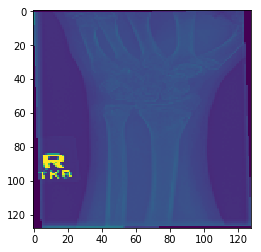

In [16]:
###Showing an image, paint it as you like(by modifying ratio!!!!)
plt.imshow(valid_img_path['img_vector'][0].reshape(128,128))